In [1]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
from scipy import stats
import tushare as ts 
import matplotlib.pyplot as plt
%matplotlib inline   

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [2]:
#使用之前先输入token，可以从个人主页上复制出来，每次调用数据需要先运行该命令
token='e0eeb08befd1f07516df2cbf9cbd58663f77fd72f92a04f290291c9d'
ts.set_token(token)
pro=ts.pro_api()

In [3]:
df = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
print(len(df))
df.head()

3610


,ts_code,symbol,name,area,industry,list_date
0,000001.SZ,000001,平安银行,深圳,银行,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,19910129
2,000004.SZ,000004,国农科技,深圳,生物制药,19910114
3,000005.SZ,000005,世纪星源,深圳,环境保护,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,19920427


In [4]:
#排除掉新股次新股，这里是只考虑2017年1月1日以前上市的股票
df=df[df['list_date'].apply(int).values<20170101]
len(df)

3024

In [5]:
#获取当前所有非新股次新股代码和名称
codes=df.ts_code.values
names=df.name.values
#构建一个字典方便调用
code_name=dict(zip(names,codes))

In [6]:
#使用tushare获取上述股票周价格数据并转换为周收益率
#设定默认起始日期为2018年1月5日，结束日期为2019年3月15日
#日期可以根据需要自己改动
def get_data(code,start='20180101', end='20190319'):
    df=pro.daily(ts_code=code, start_date=start, end_date=end,fields='trade_date,close')
    #将交易日期设置为索引值
    df.index=pd.to_datetime(df.trade_date)
    df=df.sort_index()
    #计算收益率
    return df.close

In [9]:
#构建一个空的dataframe用来装数据
data=pd.DataFrame()
for name,code in code_name.items():
    data[name]=get_data(code)

In [227]:
data.to_csv('daily_data.csv',encoding='gbk')
#data=pd.read_csv('stock_data.csv',encoding='gbk',index_col='trade_date')
#data.index=(pd.to_datetime(data.index)).strftime('%Y%m%d')

In [10]:
data.head()

,平安银行,万科A,国农科技,世纪星源,深振业A,全新好,神州高铁,中国宝安,美丽生态,深物业A,...,兆易创新,康德莱,中电电机,艾华集团,麦迪科技,洛阳钼业,中新科技,继峰股份,方盛制药,读者传媒
trade_date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,13.70,32.56,22.34,4.32,NaN,NaN,8.77,7.32,5.48,17.08,...,NaN,12.17,50.11,38.21,36.36,6.94,18.29,11.33,11.13,7.79
2018-01-03,13.33,32.33,23.80,4.27,NaN,NaN,8.75,7.42,5.53,17.14,...,NaN,12.18,51.30,38.81,36.48,7.05,18.29,11.37,11.20,7.81
2018-01-04,13.25,33.12,23.24,4.29,NaN,NaN,8.68,7.64,5.48,17.15,...,NaN,12.29,51.22,38.86,36.54,7.23,18.18,11.30,11.70,7.76
2018-01-05,13.30,34.76,23.18,4.34,NaN,NaN,8.55,7.55,5.64,17.95,...,NaN,12.15,50.60,38.53,37.12,7.16,18.15,11.22,11.55,7.81
2018-01-08,12.96,35.99,22.84,4.37,NaN,NaN,8.47,7.52,6.20,17.88,...,NaN,11.99,49.56,38.87,38.83,7.30,17.88,11.04,11.66,7.75


In [11]:
#计算收益率
def cal_ret(df,w=5):
    '''w:周5;月20;半年：120; 一年250
    '''
    df=df/df.shift(w)-1
    return df.iloc[w:,:].fillna(0)

In [13]:
ret120=cal_ret(data,w=120)
ret120.head()

,平安银行,万科A,国农科技,世纪星源,深振业A,全新好,神州高铁,中国宝安,美丽生态,深物业A,...,兆易创新,康德莱,中电电机,艾华集团,麦迪科技,洛阳钼业,中新科技,继峰股份,方盛制药,读者传媒
trade_date,,,,,,,,,,,,,,,,,,,,,
2018-07-03,-0.367153,-0.280713,-0.133841,-0.321759,0.0,0.0,0.0,-0.333333,-0.279197,-0.388759,...,0.0,-0.152835,-0.701257,-0.439937,-0.075908,-0.113833,-0.357572,0.0,-0.234501,-0.236200
2018-07-04,-0.354089,-0.288586,-0.192857,-0.313817,0.0,0.0,0.0,-0.354447,-0.282098,-0.368728,...,0.0,-0.169130,-0.725536,-0.451688,-0.089090,-0.143262,-0.351558,0.0,-0.256250,-0.247119
2018-07-05,-0.350943,-0.304046,-0.179002,-0.333333,0.0,0.0,0.0,-0.382199,-0.293796,-0.409913,...,0.0,-0.196094,-0.731160,-0.496655,-0.095785,-0.224066,-0.409241,0.0,-0.351282,-0.264175
2018-07-06,-0.348872,-0.332278,-0.178602,-0.338710,0.0,0.0,0.0,-0.374834,-0.297872,-0.433426,...,0.0,-0.177778,-0.730435,-0.491305,-0.107220,-0.210894,-0.389532,0.0,-0.355844,-0.280410
2018-07-09,-0.303241,-0.332870,-0.175131,-0.336384,0.0,0.0,0.0,-0.353723,-0.351613,-0.425615,...,0.0,-0.100083,-0.711864,-0.471572,-0.137007,-0.204110,-0.359620,0.0,-0.298456,-0.258065


In [14]:
#计算RPS
def get_RPS(ser):
    df=pd.DataFrame(ser.sort_values(ascending=False))
    df['n']=range(1,len(df)+1)
    df['rps']=(1-df['n']/len(df))*100
    return df
#计算每个交易日所有股票滚动w日的RPS
def all_RPS(data):
    dates=(data.index).strftime('%Y%m%d')
    RPS={}
    for i in range(len(data)):
        RPS[dates[i]]=pd.DataFrame(get_RPS(data.iloc[i]).values,columns=['收益率','排名','RPS'],index=get_RPS(data.iloc[i]).index)  
    return RPS  

In [15]:
rps120=all_RPS(ret120)

In [59]:
#查看2019年3月19日情况
df1=rps120['20190319']
#收益率大于1（100%）股票个数
c1=df1['收益率']>1.0
c2=df1['收益率']<1.0
c3=df1['收益率']>0.5
c4=df1['收益率']<0.5
c5=df1['收益率']>0.2
c6=df1['收益率']<0.2
c7=df1['收益率']>0.0
c8=df1['收益率']<0.0

c23=c2&c3
c34=c3&c4
c45=c4&c5
c56=c5&c6
c67=c6&c7

n1=df1[c1]['收益率'].count()
#收益率小于1（100%）大于0.5（50%）股票个数
n2=df1[c23]['收益率'].count()
n3=df1[c45]['收益率'].count()
n4=df1[c67]['收益率'].count()
n5=df1[c8]['收益率'].count()
print(n1,n2,n3,n4,n5)

49 245 1035 1221 360


In [61]:
from pyecharts import Pie
attr = ['收益率超过100%','收益率50%-100%','收益率20%-50%','收益率0%-20%','收益率为负']
v1 = [n1,n2,n3,n4,n5]
pie = Pie('')
pie.add('',attr,v1,is_label_show = True)
pie

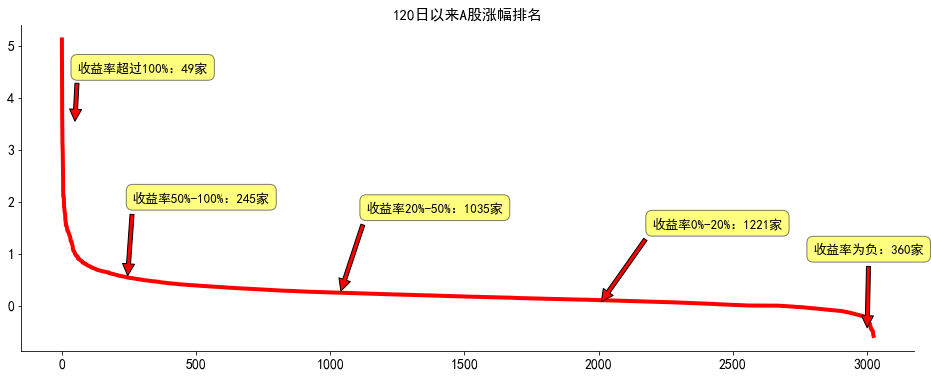

In [93]:
plt.figure(figsize=(16,6))
plt.plot(rps120['20190319']['排名'],rps120['20190319']['收益率'],color='r',linewidth=4)
plt.title('120日以来A股涨幅排名',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# 将右边 上边的两条边颜色设置为空 其实就相当于抹掉这两条边
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   

plt.annotate(f'收益率超过100%：{n1}家',
   xy=(n1,3.5),xytext=(n1+10,4.5), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=13)

plt.annotate(f'收益率50%-100%：{n2}家',
   xy=(n2,0.5),xytext=(n2+20,2), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=13)

plt.annotate(f'收益率20%-50%：{n3}家',
   xy=(n3,0.2),xytext=(n3+100,1.8), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=13)

plt.annotate(f'收益率0%-20%：{n4}家',
   xy=(2000,0),xytext=(2200,1.5), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=13)

plt.annotate(f'收益率为负：{n5}家',
   xy=(3000,-0.5),xytext=(2800,1), 
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red', 
   shrink=0.05),fontsize=13)


plt.show()

In [201]:
#获取数据函数
import tushare as ts
def get_index(code,start_date='2015-09-1'):
    df=ts.get_k_data(code,start_date)
    df.index=pd.to_datetime(df.date)
    return df.close
indexs={'sh':'上证综指','sz':'深证综指','hs300':'沪深300','sz50':'上证50','zxb':'中小板','cyb':'创业板'}
df_index=pd.DataFrame()
for code,name in indexs.items():
    df_index[name]=get_index(code)

In [222]:
def plot_index(data,day):
    ret=(data/data.shift(day)-1)[day:]
    ret.plot(figsize=(16,6))
    plt.legend(loc=2)
    plt.title(f'A股指数{day}日收益率',fontsize=15)
    ax = plt.gca()  
    ax.spines['right'].set_color('none') 
    ax.spines['top'].set_color('none')
    plt.show()

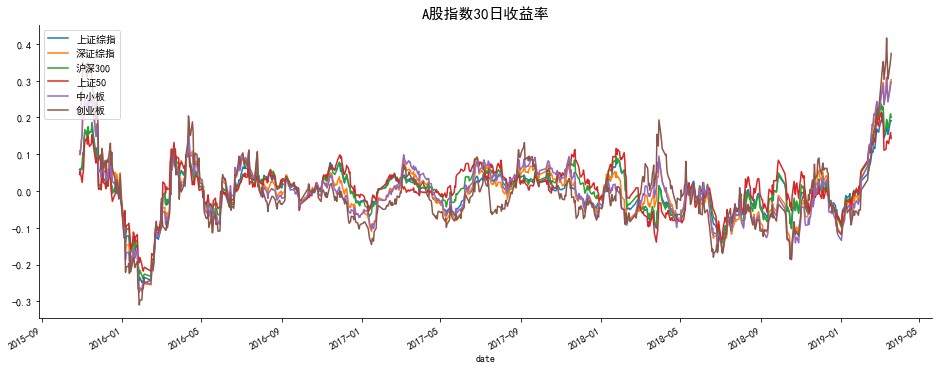

In [223]:
plot_index(df_index,30)

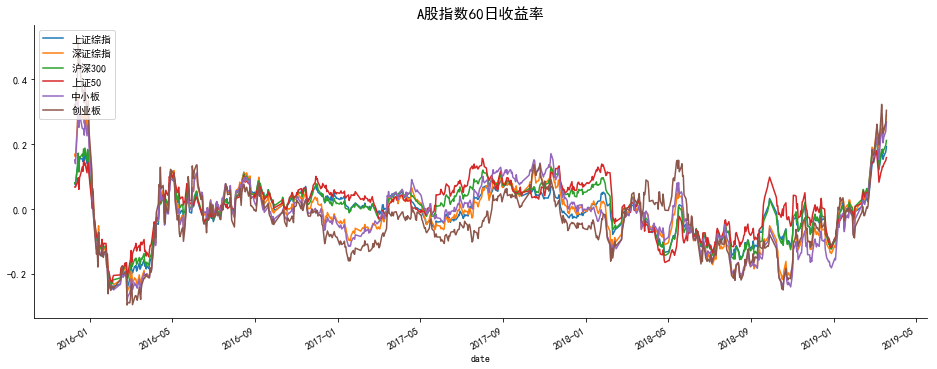

In [211]:
plot_index(df_index,60)

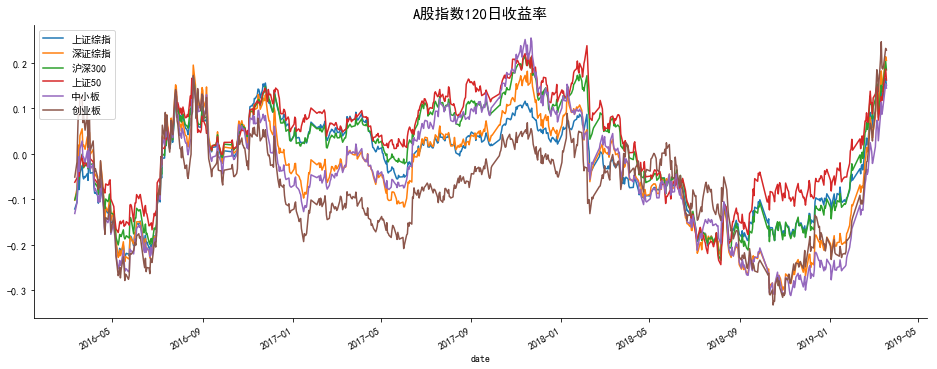

In [212]:
plot_index(df_index,120)

In [226]:
(df_index/df_index.shift(120)-1)[120:].iloc[-1]

上证综指     0.150526
深证综指     0.205295
沪深300    0.184575
上证50     0.162128
中小板      0.144443
创业板      0.228272
Name: 2019-03-19 00:00:00, dtype: float64

In [46]:
from pyecharts import Bar
attr = rps120['20190319'][:10].index
v1 = (rps120['20190319'][:10]['收益率'].values).round(2)*100

bar = Bar("120日以来涨幅前10名",title_text_size=15,title_pos='center')
bar.add("", attr, v1, is_label_show=True,is_splitline_show=False,
       label_formatter='{c}%',is_yaxis_show=False,label_text_size=13,
       is_random=True,label_text_color='black')
bar

In [112]:
from pyecharts import Bar
attr = df1['收益率'].sort_values().index[:10]
v=-(df1['收益率'].sort_values().values[:10])
v=[round(x*100,2) for x in v]

bar = Bar("120日以来涨幅后10名",title_text_size=15,title_pos='center')
bar.add("", attr,v, is_label_show=True,is_splitline_show=False,
       label_formatter='-{c}%',is_yaxis_show=False,label_text_size=13,
       is_random=True,label_text_color='black')

bar

In [123]:
#获取所有股票在某个期间的RPS值
def all_data(rps,ret):
    df=pd.DataFrame(np.NaN,columns=ret.columns,index=ret.index)
    for date in ret.index:
        date=date.strftime('%Y%m%d')
        d=rps[date]
        for c in d.index:
            df.loc[date,c]=d.loc[c,'RPS']
    return df

In [126]:
#构建一个以前面收益率为基础的空表
df_new=pd.DataFrame(np.NaN,columns=ret120.columns,index=ret120.index)

In [128]:
for date in df_new.index:
    date=date.strftime('%Y%m%d')
    d=rps120[date]
    for c in d.index:
        df_new.loc[date,c]=d.loc[c,'RPS']

In [129]:
df_new.head()

,平安银行,万科A,国农科技,世纪星源,深振业A,全新好,神州高铁,中国宝安,美丽生态,深物业A,...,兆易创新,康德莱,中电电机,艾华集团,麦迪科技,洛阳钼业,中新科技,继峰股份,方盛制药,读者传媒
trade_date,,,,,,,,,,,,,,,,,,,,,
2018-07-03,19.146825,36.607143,66.898148,27.182540,80.092593,79.761905,80.687831,25.000000,37.235450,15.773810,...,79.695767,63.690476,0.165344,9.953704,74.041005,69.411376,20.469577,79.794974,48.247354,47.685185
2018-07-04,25.033069,39.583333,60.978836,33.333333,86.574074,86.474868,86.210317,24.966931,41.335979,22.023810,...,87.169312,64.947090,0.132275,10.251323,75.132275,68.551587,25.429894,86.838624,47.850529,50.231481
2018-07-05,29.398148,41.898148,67.162698,34.027778,84.424603,85.052910,84.953704,23.478836,44.444444,18.253968,...,83.796296,64.847884,0.132275,7.870370,76.421958,59.457672,18.452381,84.193122,29.166667,51.091270
2018-07-06,30.059524,34.060847,67.394180,32.308201,85.152116,85.218254,85.350529,24.173280,42.857143,14.517196,...,85.052910,67.559524,0.165344,8.134921,75.628307,62.235450,21.263228,84.887566,28.571429,46.726190
2018-07-09,37.665344,30.753968,65.112434,30.059524,81.250000,81.712963,81.349206,26.124339,26.554233,14.219577,...,81.415344,74.570106,0.231481,9.060847,70.469577,60.019841,24.603175,81.283069,39.120370,48.842593


In [142]:
def plot_rps(stock):
    plt.subplot(211)
    data[stock][120:].plot(figsize=(16,16),color='r')
    plt.title(stock+'股价走势',fontsize=15)
    plt.yticks(fontsize=12)
    plt.xticks([])
    ax = plt.gca()  
    ax.spines['right'].set_color('none') 
    ax.spines['top'].set_color('none') 
    plt.subplot(212)
    df_new[stock].plot(figsize=(16,8),color='b')
    plt.title(stock+'RPS相对强度',fontsize=15)
    my_ticks = pd.date_range('2018-06-9','2019-3-31',freq='m')
    plt.xticks(my_ticks,fontsize=12)
    plt.yticks(fontsize=12)
    ax = plt.gca()  
    ax.spines['right'].set_color('none') 
    ax.spines['top'].set_color('none')
    plt.show()

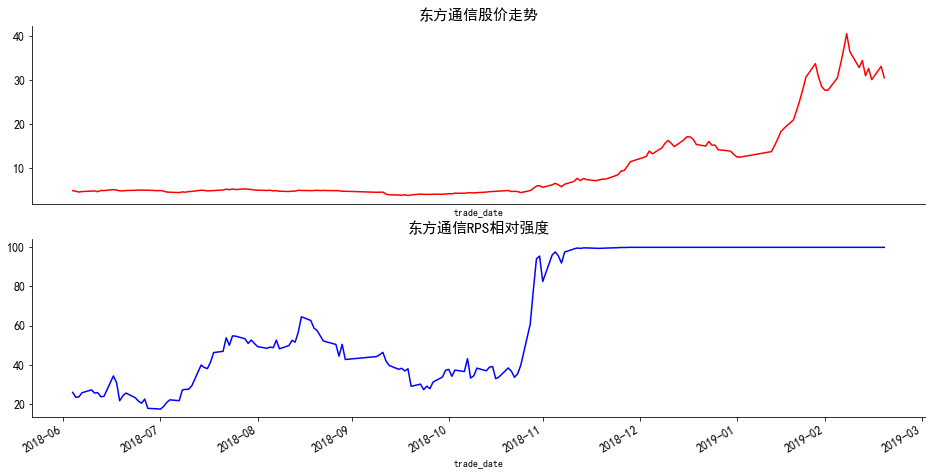

In [143]:
plot_rps('东方通信')

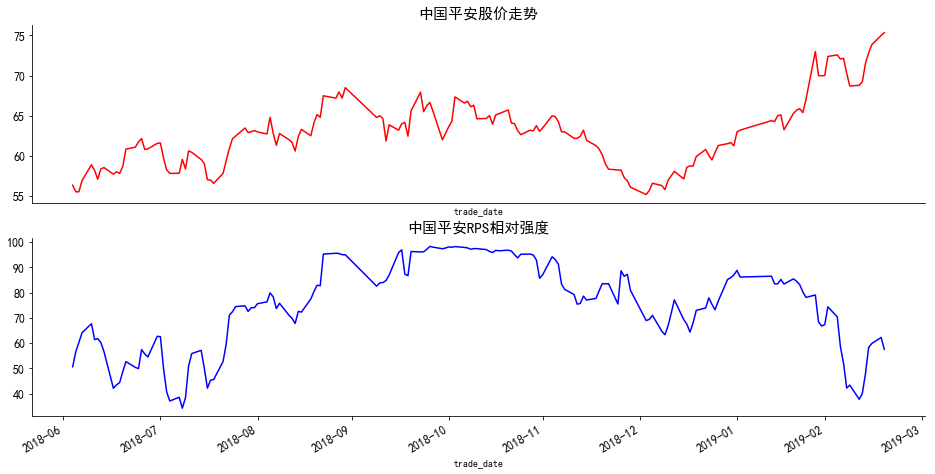

In [145]:
plot_rps('中国平安')

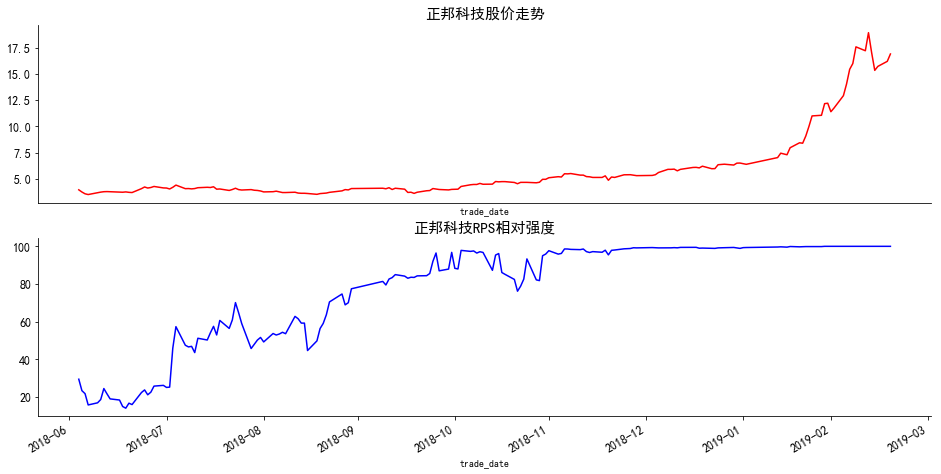

In [147]:
plot_rps('正邦科技')

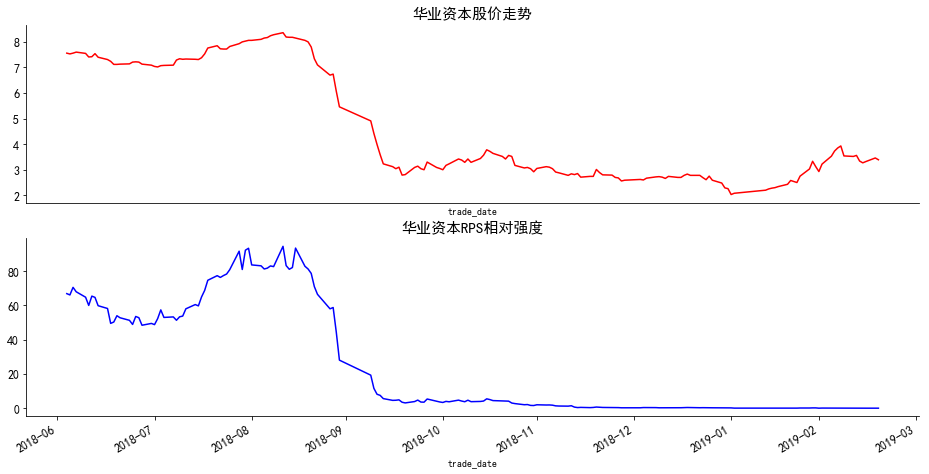

In [146]:
plot_rps('华业资本')

In [159]:
x1=df1['收益率']>0
x2=df1['RPS']>90
x=x1&x2
df1[x].head(10)

,收益率,排名,RPS
东方通信,5.122490,1.0,99.966931
正邦科技,3.655647,2.0,99.933862
天邦股份,3.124726,3.0,99.900794
市北高新,2.980247,4.0,99.867725
人民网,2.629389,5.0,99.834656
大智慧,2.103448,6.0,99.801587
*ST凡谷,2.098485,7.0,99.768519
唐人神,2.097345,8.0,99.735450
龙津药业,1.888530,9.0,99.702381
*ST毅达,1.874126,10.0,99.669312


In [176]:
def plot_k_line(stock,start='20181010'):
    from pyecharts import Kline
    d1=pro.daily(ts_code=code_name[stock], start_date=start, fields='trade_date,open,close,low,high')
    d1.index=pd.to_datetime(d1.trade_date)
    d1=d1.sort_index()
    v1=list(d1.loc[:,['open','close','low','high']].values)
    v0=(d1.index).strftime('%y%m%d')
    kline = Kline(stock+"K线图",title_pos='center',title_text_size=15)
    kline.add("", v0, v1,is_datazoom_show=True,mark_line=["average"],
              mark_point=["max", "min"],mark_point_symbolsize=80,
              mark_line_valuedim=['highest', 'lowest'] )
    return kline

In [178]:
plot_k_line("东方通信")

In [177]:
plot_k_line("正邦科技")

In [179]:
plot_k_line("华业资本")

In [157]:
x1=df1['收益率']>0
x2=df1['收益率']<0.50
x3=df1['RPS']>90
x=x1&x2&x3
df1[x]

,收益率,排名,RPS
麦迪科技,0.499392,296.0,90.211640
苏州科达,0.498072,297.0,90.178571
上海三毛,0.497685,298.0,90.145503
兆驰股份,0.497630,299.0,90.112434
麦捷科技,0.496324,300.0,90.079365
大连圣亚,0.493842,301.0,90.046296
中核科技,0.493295,302.0,90.013228


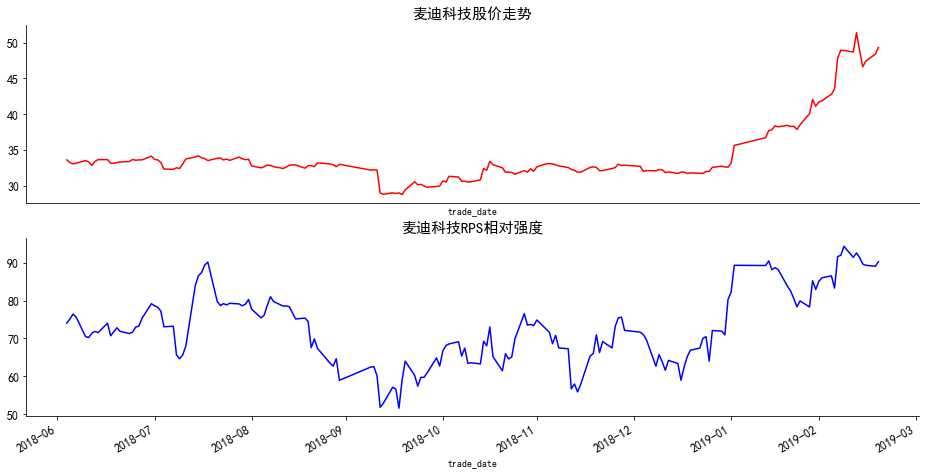

In [153]:
plot_rps('麦迪科技')

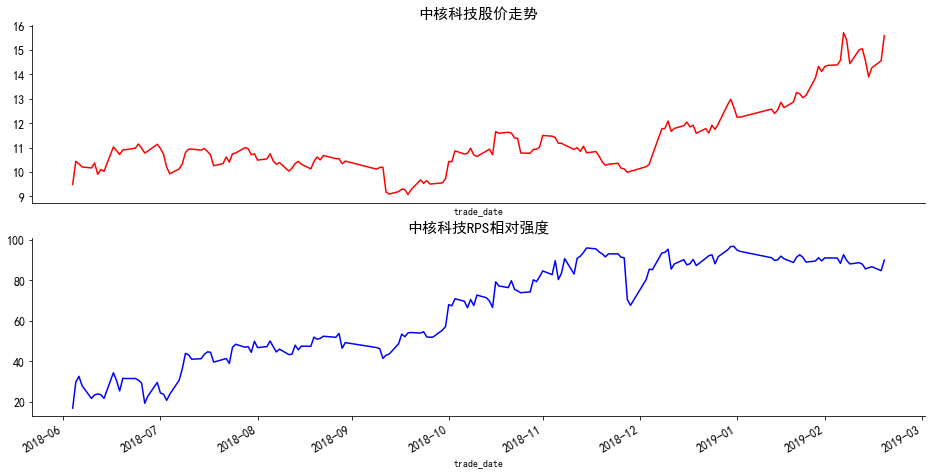

In [158]:
plot_rps('中核科技')